In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dfs=pd.read_html('https://docs.google.com/spreadsheets/d/e/2PACX-1vRTK2NvcndgPX41Czu6Ft2Ho_nE-z50BgTqdzwFW0rsJ2nvyNLe2DoIg1COzUbgw80oaRBjfy5-WtFk/pubhtml?urp=gmail_link')
df=dfs[0]
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,1,x,y
1,2,24,21.54945196
2,3,50,47.46446305
3,4,15,17.21865634
4,5,38,36.58639803
5,6,87,87.28898389
6,7,36,32.46387493
7,8,12,10.78089683
8,9,81,80.7633986
9,10,25,24.61215147


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  701 non-null    int64 
 1   Unnamed: 1  701 non-null    object
 2   Unnamed: 2  700 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.6+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')

In [5]:
df.drop(['Unnamed: 0'],axis=1)
df.rename(columns = {'Unnamed: 1':'X','Unnamed: 2':'Y'}, inplace = True)
df.drop('Unnamed: 0',axis=1)
df1=df.drop(0)
df1.head(10)
df1=df1.drop('Unnamed: 0',axis=1)
df1.head(10)

,X,Y
1,24,21.54945196
2,50,47.46446305
3,15,17.21865634
4,38,36.58639803
5,87,87.28898389
6,36,32.46387493
7,12,10.78089683
8,81,80.7633986
9,25,24.61215147
10,5,6.963319071


In [6]:
df1['X'].unique()

array(['24', '50', '15', '38', '87', '36', '12', '81', '25', '5', '16',
       '39', '54', '60', '26', '73', '29', '31', '68', '58', '84', '49',
       '20', '90', '48', '4', '42', '0', '93', '7', '21', '19', '59',
       '51', '33', '85', '44', '14', '9', '75', '69', '10', '17', '74',
       '64', '32', '41', '3', '11', '83', '76', '95', '53', '77', '55',
       '35', '86', '13', '46', '8', '71', '28', '56', '79', '89', '27',
       '70', '45', '37', '47', '80', '94', '99', '65', '100', '6', '2',
       '82', '57', '52', '97', '61', '62', '3530.157369', '72', '78',
       '18', '67', '66', '98', '91', '40', '96', '1', '34', '92', '88',
       '30', '22', '23', '63', '43'], dtype=object)

In [7]:
df1['Y'].unique()

array(['21.54945196', '47.46446305', '17.21865634', '36.58639803',
       '87.28898389', '32.46387493', '10.78089683', '80.7633986',
       '24.61215147', '6.963319071', '11.23757338', '13.53290206',
       '24.60323899', '39.40049976', '48.43753838', '61.69900319',
       '26.92832418', '70.4052055', '29.34092408', '25.30895192',
       '69.02934339', '84.99484703', '57.04310305', '50.5921991',
       '83.02772202', '57.05752706', '47.95883341', '24.34226432',
       '94.68488281', '48.03970696', '7.08132338', '21.99239907',
       '42.33151664', '0.329089443', '61.92303698', '91.17716423',
       '39.45358014', '5.996069607', '22.59015942', '61.18044414',
       '85.02778957', '-1.28631089', '61.94273962', '21.96033347',
       '33.66194193', '17.60946242', '58.5630564', '52.82390762',
       '22.1363481', '35.07467353', '86.18822311', '42.63227697',
       '4.09817744', '61.2229864', '17.70677576', '11.85312574',
       '80.23051695', '62.64931741', '9.616859804', '20.02797699',
   

In [8]:
df1.info()
df1.dtypes
df1.dropna(subset=['X'], inplace=True)
df1.dropna(subset=['Y'], inplace=True)
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 1 to 700
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       700 non-null    object
 1   Y       699 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB


X    0
Y    0
dtype: int64

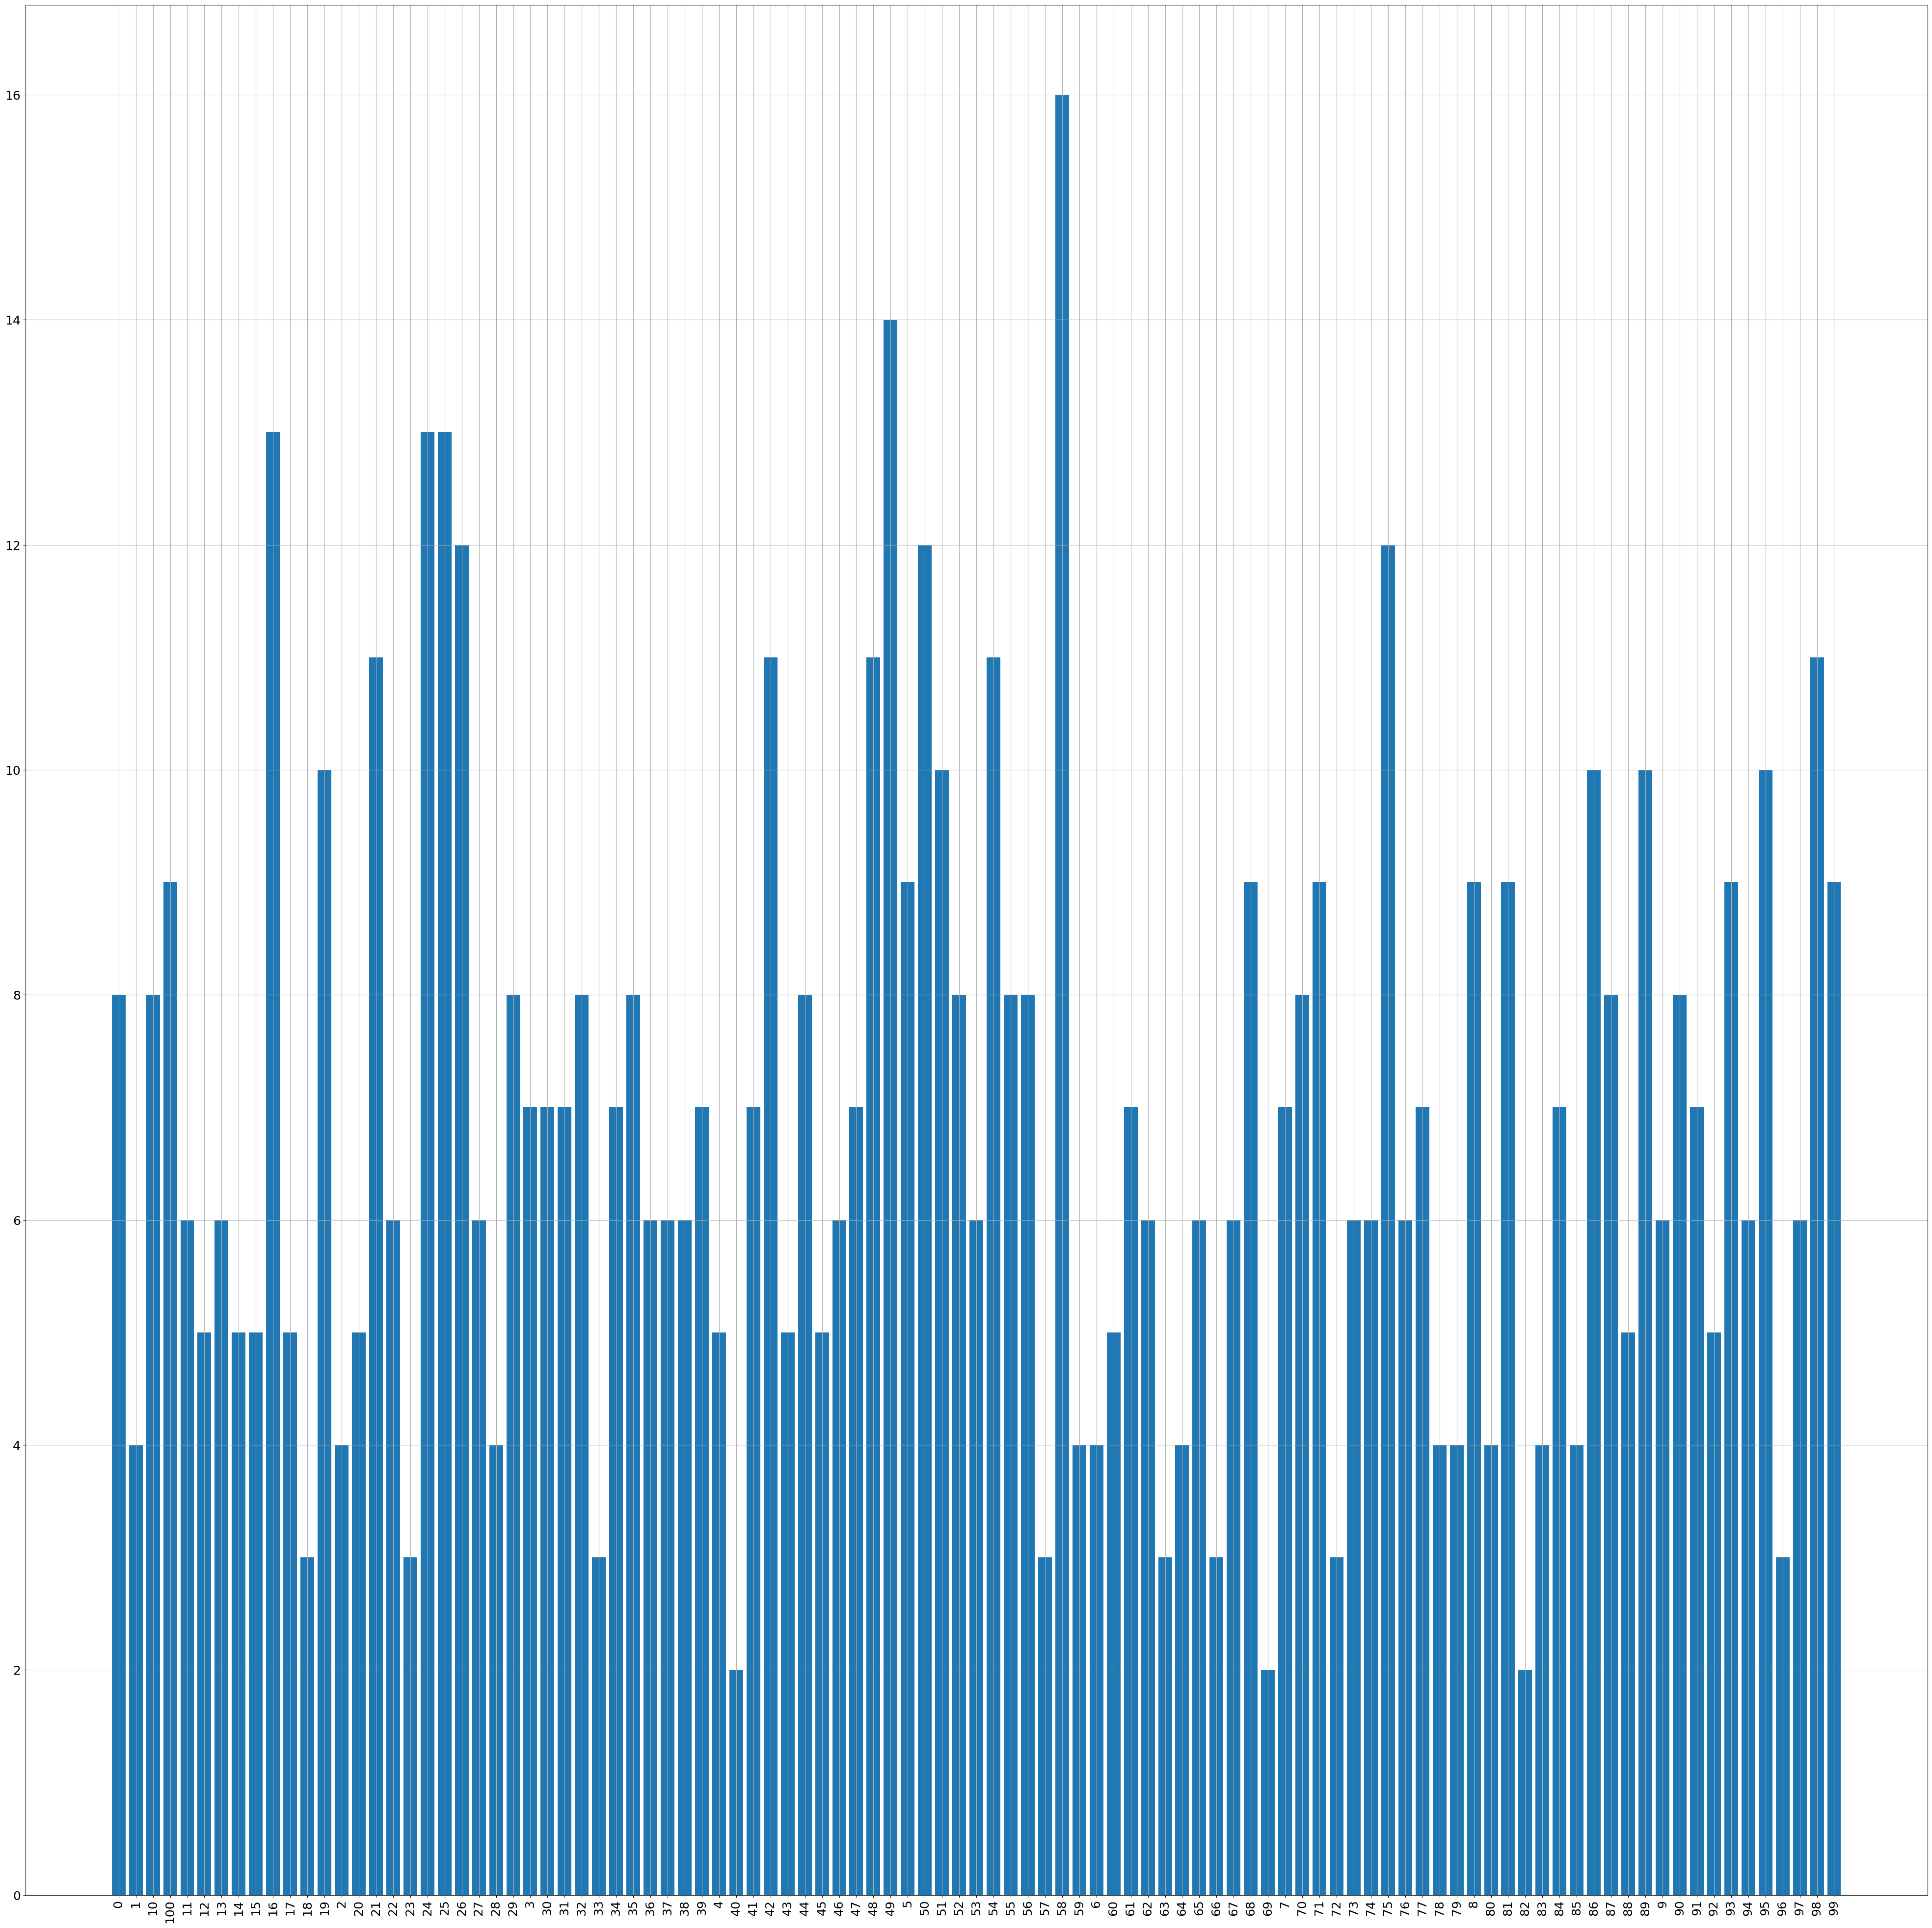

In [9]:
plt.figure(figsize=(50,50))
plt.bar(np.unique(df1["X"], return_counts=True)[0], np.unique(df1["X"], return_counts=True)[1])
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

In [10]:
x = df1['X'].values
x = x.reshape(-1, 1)
y= df1['Y'].values
y = y.reshape(-1, 1)
print(x)
print(y)

[['24']
 ['50']
 ['15']
 ['38']
 ['87']
 ['36']
 ['12']
 ['81']
 ['25']
 ['5']
 ['16']
 ['16']
 ['24']
 ['39']
 ['54']
 ['60']
 ['26']
 ['73']
 ['29']
 ['31']
 ['68']
 ['87']
 ['58']
 ['54']
 ['84']
 ['58']
 ['49']
 ['20']
 ['90']
 ['48']
 ['4']
 ['25']
 ['42']
 ['0']
 ['60']
 ['93']
 ['39']
 ['7']
 ['21']
 ['68']
 ['84']
 ['0']
 ['58']
 ['19']
 ['36']
 ['19']
 ['59']
 ['51']
 ['19']
 ['33']
 ['85']
 ['44']
 ['5']
 ['59']
 ['14']
 ['9']
 ['75']
 ['69']
 ['10']
 ['17']
 ['58']
 ['74']
 ['21']
 ['51']
 ['19']
 ['50']
 ['24']
 ['0']
 ['12']
 ['75']
 ['21']
 ['64']
 ['5']
 ['58']
 ['32']
 ['41']
 ['7']
 ['4']
 ['5']
 ['49']
 ['90']
 ['3']
 ['11']
 ['32']
 ['83']
 ['25']
 ['83']
 ['26']
 ['76']
 ['95']
 ['53']
 ['77']
 ['42']
 ['25']
 ['54']
 ['55']
 ['0']
 ['73']
 ['35']
 ['86']
 ['90']
 ['13']
 ['46']
 ['46']
 ['32']
 ['8']
 ['71']
 ['28']
 ['24']
 ['56']
 ['49']
 ['79']
 ['90']
 ['89']
 ['41']
 ['27']
 ['58']
 ['26']
 ['31']
 ['70']
 ['71']
 ['39']
 ['7']
 ['48']
 ['56']
 ['45']
 ['41']


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
y_hat

array([[28.97952807],
       [57.93070834],
       [83.88693893],
       [75.90040645],
       [53.9374421 ],
       [50.94249242],
       [97.86337079],
       [24.98626183],
       [51.94080898],
       [45.95090961],
       [15.00309622],
       [71.9071402 ],
       [70.90882364],
       [13.00646309],
       [24.98626183],
       [61.92397459],
       [87.88020518],
       [94.86842111],
       [65.91724083],
       [60.92565803],
       [69.91050708],
       [57.93070834],
       [92.87178799],
       [36.96606056],
       [38.96269368],
       [ 3.02329748],
       [49.94417586],
       [ 5.0199306 ],
       [85.88357206],
       [49.94417586],
       [36.96606056],
       [21.99131214],
       [47.94754273],
       [40.95932681],
       [74.90208988],
       [72.90545676],
       [60.92565803],
       [59.92734147],
       [68.91219052],
       [20.99299558],
       [72.90545676],
       [19.99467902],
       [85.88357206],
       [18.99636246],
       [41.95764337],
       [99

In [19]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat)
print("#" * 40)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print("#" * 40)

########################################
Mean Absolute Error (MAE): 2.21
Mean Squared Error (MSE): 7.55
Root Mean Squared Error (RMSE): 2.75
R-squared (R2) Score: 0.99
########################################
